In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
global_df = pd.read_csv('global.csv', index_col='year')
xian_df = pd.read_csv('xian.csv', index_col='year')
newyork_df = pd.read_csv('newyork.csv', index_col='year')

temp_df = pd.DataFrame({
    'Global': global_df.avg_temp, 
    "Xi'an": xian_df.avg_temp,
    "New York": newyork_df.avg_temp
})

In [3]:
temp_df.head()

,Global,New York,Xi'an
year,,,
1743,NaN,3.26,NaN
1744,NaN,11.66,NaN
1745,NaN,1.13,NaN
1746,NaN,NaN,NaN
1747,NaN,NaN,NaN


In [4]:
temp_df.tail()

,Global,New York,Xi'an
year,,,
2011,9.52,11.27,12.08
2012,9.51,11.97,11.90
2013,9.61,12.16,14.46
2014,9.57,NaN,NaN
2015,9.83,NaN,NaN


It seems that there are lots of missing values. Let's fill them with previous years' data (if any), and plot the 10-year rolling means tentatively.

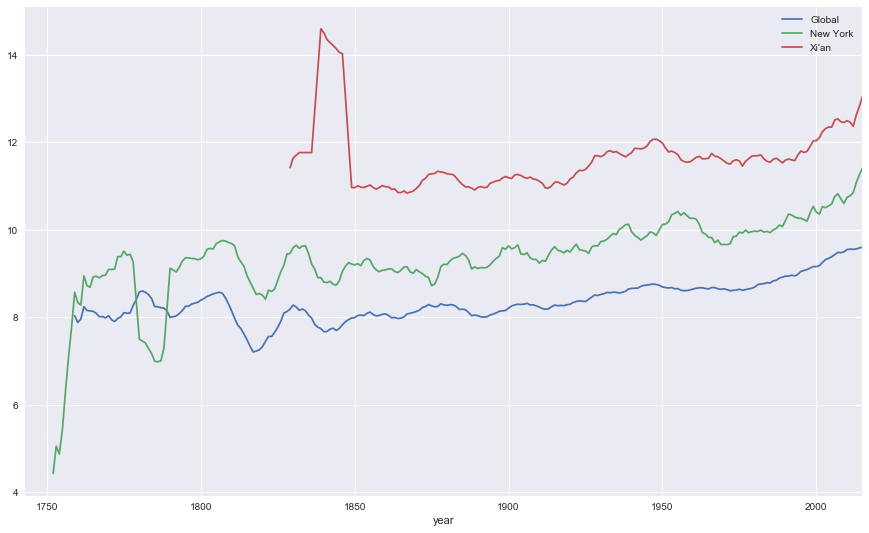

In [5]:
(temp_df
    .fillna(method='ffill')
    .rolling(10).mean()
    .plot(figsize=(15, 9))
)

Investigate the jump of Xi'an around before 1850 and the dips of New York before 1800.

In [6]:
temp_df.loc[1820:1850, "Xi'an"]

year
1820     9.55
1821    11.12
1822    11.16
1823    11.76
1824      NaN
1825      NaN
1826      NaN
1827      NaN
1828      NaN
1829      NaN
1830      NaN
1831      NaN
1832      NaN
1833      NaN
1834      NaN
1835      NaN
1836      NaN
1837    21.19
1838      NaN
1839      NaN
1840    10.81
1841    10.26
1842    11.05
1843    11.12
1844    11.01
1845    10.91
1846    11.49
1847    11.24
1848    10.79
1849    10.94
1850    10.76
Name: Xi'an, dtype: float64

In [7]:
temp_df.loc[:1800, 'New York']

year
1743     3.26
1744    11.66
1745     1.13
1746      NaN
1747      NaN
1748      NaN
1749      NaN
1750    10.07
1751    10.79
1752     2.81
1753     9.52
1754     9.88
1755     6.61
1756     9.94
1757     8.89
1758     8.15
1759     9.01
1760     7.73
1761    10.18
1762     9.55
1763     7.23
1764     9.55
1765     8.96
1766    10.09
1767     8.52
1768     8.67
1769     9.10
1770     9.04
1771    10.18
1772     9.64
1773    10.08
1774     9.52
1775    10.24
1776     9.13
1777     8.77
1778     6.89
1779     0.25
1780      NaN
1781     9.79
1782     9.15
1783     8.81
1784     8.40
1785     8.49
1786     8.98
1787     8.97
1788     9.77
1789     9.42
1790     9.39
1791     9.37
1792     8.72
1793     9.88
1794     9.83
1795     9.21
1796     8.97
1797     8.85
1798     9.71
1799     9.19
1800     9.58
Name: New York, dtype: float64

In [8]:
# Get rid of potential outliers, to prevent contaminating subsequent string of nans 
temp_df.loc[1837, "Xi'an"] = np.nan
temp_df.loc[1743:1745, 'New York'] = np.nan
temp_df.loc[1779, 'New York'] = np.nan

In [9]:
# Reajust the column order, to make plotting (order of lines and legend) more intuitive
temp_df = temp_df[["Xi'an", 'New York', 'Global']]

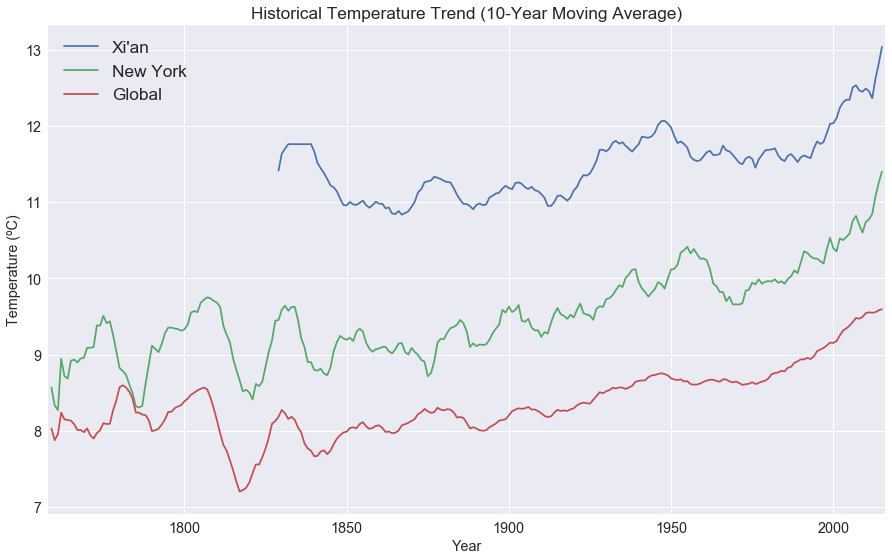

In [10]:
(temp_df
    .fillna(method='ffill')
    .rolling(10).mean()
    .plot(xlim=(1758, 2016), figsize=(15, 9), fontsize='x-large')
)

plt.title('Historical Temperature Trend (10-Year Moving Average)', fontsize='xx-large')
plt.ylabel('Temperature (ºC)', fontsize='x-large')
plt.xlabel('Year', fontsize='x-large')
plt.legend(fontsize='xx-large')

Let's do some statistics.

In [12]:
temp_df.dropna(inplace=True)

In [13]:
from scipy.stats import pearsonr
pearsonr(temp_df["Xi'an"], temp_df['Global'])

(0.78374203504023776, 3.0035893260222405e-38)

In [14]:
(temp_df["Xi'an"] - temp_df['Global']).mean()

2.9615730337078663